In [1]:
a=2
b=3
print (a*b)


6


In [3]:
radio=input("please enter the radius of the circumference")
PI=3.1416
longitud=2*PI*float(radio)
print("The length of the circumference is:", round(longitud,2))

please enter the radius of the circumference4
The length of the circumference is: 25.13


In [4]:
import numpy as np


In [5]:
a=np.array([1,2,3])
print (a)

[1 2 3]


In [7]:
b=np.array([[9.1,3.2,4.3],[0.3,1.9,2.5]])
print (b)

[[9.1 3.2 4.3]
 [0.3 1.9 2.5]]


In [8]:
#get dimension
b.ndim

2

In [11]:
#get shape

b.shape

(2, 3)

In [12]:
#get type
a.dtype

dtype('int32')

In [14]:
# to specify the type
a=np.array([1,2,3], dtype='int32')
#get type
a.dtype

dtype('int32')

In [15]:
#get total size
a.size

3

In [16]:
a=np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]])
#get a specific element[r,c], e.g nr 13
a[1,5] #because indexing starts from 0


13

In [17]:
#get a specific row
a[0,:]

array([1, 2, 3, 4, 5, 6, 7])

In [18]:
#get a specific column
a[:,2]

array([ 3, 10])

In [1]:
import scipy.stats as stats     # Statistics module
import numpy as np              # Module for, among others, matrix operations
import matplotlib.pyplot as plt # Plotting

In [2]:
#question 1: what is the square root of two?
# Your answer comes here 
s=np.sqrt(2.)
print("The square root of 2 is:",s)

The square root of 2 is: 1.4142135623730951


In [4]:
#load the data
d = np.load("data.npz")

In [5]:
print("'data.npz' is a file that contains a number of variables, called:")
for k in d.keys():
    print('  ', k, 'which is of size',d[k].shape)

'data.npz' is a file that contains a number of variables, called:
   a which is of size (300, 1)
   v2 which is of size (1000, 1)
   b which is of size (300, 1)
   l which is of size (1000, 1)
   v which is of size (200000, 1)


In [8]:
# Let us play with vector 'v'    
v = d['v']
print("  The order of V", v.shape)
print("  The two-norm of v", np.sqrt(v.T.dot(v)))

print("Timing inner product")
%time v.T.dot(v)

  The order of V (200000, 1)
  The two-norm of v [[446.56104741]]
Timing inner product
Wall time: 0 ns


array([[199416.76906532]])

In [9]:
# The following code counts how many elements in v are larger than t (and times how long it takes to do that)
# This relies on "list comprehension," which makes for some very compact code but may require some getting used to
%time for t in [1,2,3,4,5]: print("  Number of elements >",t,":",len([x for x in v if x>t]))


  Number of elements > 1 : 31834
  Number of elements > 2 : 4472
  Number of elements > 3 : 262
  Number of elements > 4 : 9
  Number of elements > 5 : 0
Wall time: 966 ms


In [10]:
# Here are some other ways to do the same:
# Using numpy vector operations
%time for t in [1,2,3,4,5]: print("  Using numpy, the number of elements >",t,":",np.sum(v>t))
    

  Using numpy, the number of elements > 1 : 31834
  Using numpy, the number of elements > 2 : 4472
  Using numpy, the number of elements > 3 : 262
  Using numpy, the number of elements > 4 : 9
  Using numpy, the number of elements > 5 : 0
Wall time: 4.01 ms


In [11]:
# using a standard for loop:

def countLargerThan(t):
    count=0
    for x in v:
        if x>t:
            count+=1
    return count

def countAll():
    for t in range(1,6):
        print("  Using for loops, the number of elements >",t,":",countLargerThan(t))
%time countAll()

  Using for loops, the number of elements > 1 : 31834
  Using for loops, the number of elements > 2 : 4472
  Using for loops, the number of elements > 3 : 262
  Using for loops, the number of elements > 4 : 9
  Using for loops, the number of elements > 5 : 0
Wall time: 925 ms


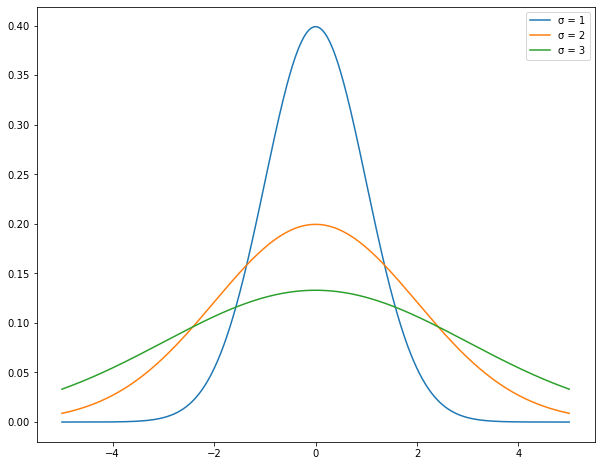

In [12]:
#Plotting
#Question 3 Plot, in the range  [−5…5] , the Gaussian PDFs with parameters  (𝜇=0,𝜎=1),(𝜇=0,𝜎=2),(𝜇=0,𝜎=3) . 
#Use the functions plt.plot, stats.norm.pdf and plt.legend
lineSpace = np.linspace(-5, 5, 1000)

pdf1 = stats.norm.pdf(lineSpace, 0, 1)
pdf2 = stats.norm.pdf(lineSpace, 0, 2)
pdf3 = stats.norm.pdf(lineSpace, 0, 3)

figureFormat = plt.figure(figsize=(10,8))

plt.plot(lineSpace, pdf1, label = '\u03C3 = 1', figure = figureFormat)
plt.plot(lineSpace, pdf2, label = '\u03C3 = 2', figure = figureFormat)
plt.plot(lineSpace, pdf3, label = '\u03C3 = 3', figure = figureFormat)

plt.legend()

-0.05312146691764375
1.0218134446944023


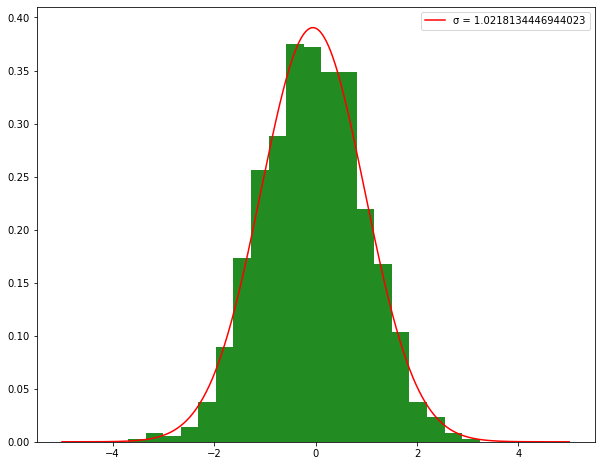

In [13]:
#Playing with matrices and Python
#Question 4 Plot a normalised histogram of the elements in vector v2 using 20 bins, and superimpose a plot,
#in the range  [−5,…,5]  of the Gaussian distribution with the mean and variance of the data. Use the built-in functions to compute these. 
#In particular, use np.mean and np.cov to fit the parameters to the data.
v2 = d['v2']
linspace = np.linspace(-5, 5, 1000)

mu = np.mean(v2)
sigma = np.cov(v2.T)

print(mu)
print(sigma)

pdf = stats.norm.pdf(linspace, mu, sigma)
figureFormat = plt.figure(figsize=(10,8))

weights = np.ones_like(v2)/len(v2)

plt.plot(lineSpace, pdf, label = '\u03C3 = ' + str(sigma), figure = figureFormat, color = 'red')
plt.hist(v2, bins = 20, density=True, color = 'forestgreen')

plt.legend()

In [15]:
#Question 5 Write your own code to compute these parameters and compare the values you obtain to those returned by the built-in function. 
#How does your implementation compare in terms of execution speed?
def buildIn():
    mu = np.mean(v2)
    sigma = np.cov(v2.T)
    print(mu)
    print(sigma)
    
def custom():
    mu2 = np.sum(v2)/len(v2)
    sigma2 = np.sum(np.power(v2 - mu2, 2))/len(v2)
    print(mu2)
    print(sigma2)
    
%time buildIn()

%time custom()

-0.05312146691764375
1.0218134446944023
Wall time: 1e+03 µs
-0.05312146691764375
1.020791631249708
Wall time: 0 ns


In [16]:
#Question 6 Load the dataset in data-2class.npz. This file contains a set of 2-dimensional points  𝑑 , and a corresponding set of labels  𝑙 
#Create a 2D scatterplot of  𝑑 , using red for the elements with corresponding label 0, and blue for  𝑙𝑖=1 
#Draw a straight line separating the two classes. That is, figure out by hand how that line should look and plot it.
#Fit two 2D Gaussian distributions, to the points with label  𝑙𝑖=0  and  𝑙𝑖=1 .
#Create a heatmap of these distributions, and overlay a scatterplot of the data.

# Our own implementation of the multivariate Gaussian Distribution
class Gauss:
    """Class for computing the probability density function of a Gaussian distribution with given 
    mean vector and covariance matrix, at point x"""
    
    def __init__(self, mu, sigma):
        """Initialise a distribution with mean mu and covariance sigma
        
        Precompute and store everything that is not dependent
        on the datapont, so as to keep things efficient"""
        D = mu.size
        
        self.mu = mu
        self.icov = np.linalg.inv(sigma)
        sign,ld = np.linalg.slogdet(sigma)
        if sign != 1:
            print("Sign=",sign)
        
        self.lognum = D*np.log(2*np.pi) + ld
                            
    def logprob(self,x):
        """return log(p(x))"""
        d = x-self.mu
        return -.5 * (self.lognum + np.dot(np.dot(d,self.icov),d))
    
    def prob(self,x):
        """return p(x)"""
        return np.exp(self.logprob(x)) 

In [17]:
data = np.load("data-2class.npz")
for k in data.keys():
    print(k)
d = data['d']
l = data['l'].flatten()
    
    
# Using matplotlib to plot a heatmap
from matplotlib import mlab

d
l


In [18]:
ordered = {}
for x,y in zip(d, l):
    ordered.setdefault(y, []).append(x)
group1 = np.array(ordered[0])
group2 = np.array(ordered[1])

In [19]:
mu = np.mean(group1)
sigma = np.cov(group1.T)

print(mu)
print(sigma)

gauss1 = Gauss(mu, sigma)

mu2 = np.mean(group1)
sigma2 = np.cov(group2.T)

gauss2 = Gauss(mu2, sigma2)
group1[0]

0.023432442758631017
[[1.0082275  0.89013228]
 [0.89013228 1.9444243 ]]


array([1.13809416, 1.74621778])

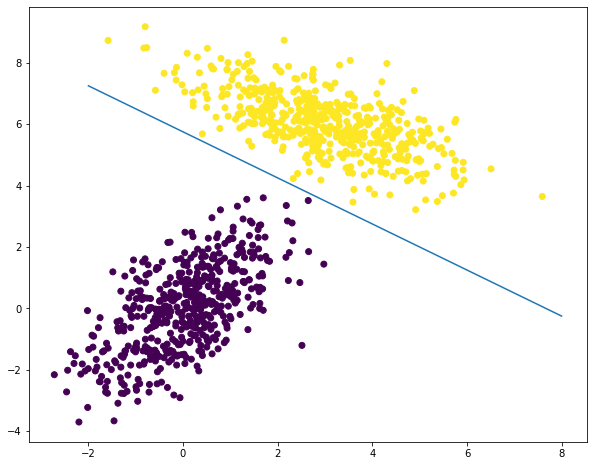

In [20]:
figureFormat = plt.figure(figsize=(10,8))
plt.scatter(d.T[0], d.T[1], figure = figureFormat, c = l)
plt.plot((8,-2), (-0.25,7.25))

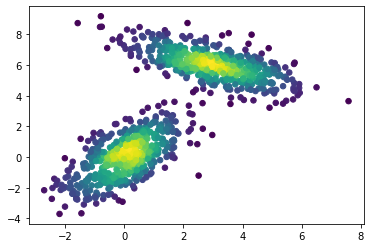

In [22]:
#Alternative approach

from scipy.stats import gaussian_kde
xy1 = np.vstack([group1.T[0], group1.T[1]])
z = gaussian_kde(xy1)(xy1)

xy2 = np.vstack([group2.T[0], group2.T[1]])
z2 = gaussian_kde(xy2)(xy2)

figureFormat, ax = plt.subplots()
ax.scatter(group1.T[0], group1.T[1], c=z, s=30)
ax.scatter(group2.T[0], group2.T[1], c=z2, s=30)

plt.show()